# Ranking Distribution and SRCC

In [1]:
# import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import *
import datetime
%load_ext autoreload
%autoreload 2
curr_dataset = 'ml-100k'

## optimizer

### Ranking Distribution in ml-100k

group len: 3, shape: (196,)
opt_srcc: 0.03036


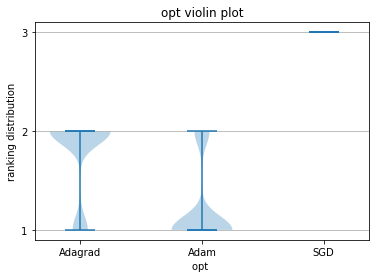

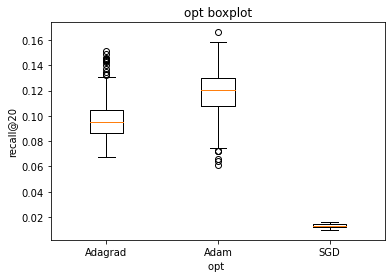

In [9]:
import json 
from utils import violin_plot
optgroups = np.array([[],[],[]],dtype='int32')
load_dict_list = []
files = [os.path.join('opt_random', 'opt_dicts_ml-100k.json')]
files += [os.path.join('opt_random', 'optinfo' + str(num) + '.json') for num in []]
for f1 in files:
     with open(f1,'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          optgroups = np.concatenate((optgroups , group_tmp ), axis=1)

print("group len: {}, shape: {}".format(len(optgroups), optgroups[0].shape))
# print("group len: {}, shape: {}\ngroups: {}".format(len(groups), groups[0].shape, groups))
optranks = get_rank_from_score(optgroups)
opt_srcc = get_srcc_from_rank(groups=optgroups, ranks=optranks, optslist=['Adagrad', 'Adam', 'SGD'])
print("opt_srcc: {:.4}".format(opt_srcc))
viofig = violin_plot(groups=optgroups, xlabel=['Adagrad', 'Adam', 'SGD'], figtitle='opt ')
viofig.savefig(os.path.join('box_violin_plot', os.path.join('opt_violin_plot_'+curr_dataset)))
hpfig = hp_boxplot(groups=optgroups, xlabel=['Adagrad', 'Adam', 'SGD'], figtitle='opt ')
hpfig.savefig(os.path.join('box_violin_plot', os.path.join( 'opt_boxplot_'+curr_dataset)))


## learning rate

### Ranking Distribution in ml-100k lr @ random single model


ranks.shape: (146, 12)
lrsrcc: 0.2866


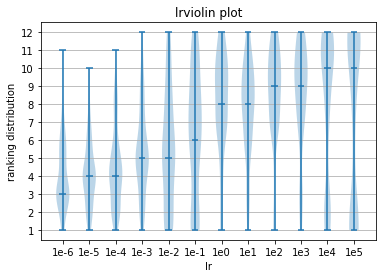

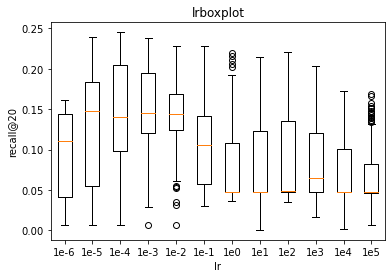

In [18]:
# using better models
import json 
import numpy as np
%reload_ext autoreload
%autoreload 2
from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
# lrgroups = np.array([[],[],[],[],[],[],[],[],[],[],[],[]],dtype='float')
lr_hp_list0 = ['1e-6','1e-5', '1e-4','1e-3', '1e-2', '1e-1', '1e0','1e1','1e2', '1e3', '1e4', '1e5']
lr_hp_list = [str(float(lr)) for lr in lr_hp_list0]
lrgroups = np.array([[] for item in lr_hp_list],dtype='float')

# load_dict_list = []
files = []
files += [os.path.join('lr_random', 'lr_random_nas_dicts_ml-100k_1.json')]
files += [os.path.join('lr_random', 'lrinfo' + str(num) + '.json') for num in [251,252,253,254,255,256]]
for f1 in files:
     with open(f1,'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          # load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          lrgroups = np.concatenate((lrgroups , group_tmp), axis=1)
# load_dict = load_dict1.copy()
# print(lrgroups)
# print("group len: {}, shape: {}".format(len(lrgroups), lrgroups[0].shape[0]))
lr_hp_num = 12
lrgroups = lrgroups[:lr_hp_num,:]
lrranks = get_rank_from_score(lrgroups)
# print(lrranks)
print("ranks.shape: {}".format(lrranks.shape))
lr_srcc = get_srcc_from_rank(groups=lrgroups, ranks=lrranks, optslist=lr_hp_list[:lr_hp_num])
print("lrsrcc: {:.4}".format(lr_srcc))
fig = violin_plot(groups=lrgroups, xlabel=lr_hp_list0[:lr_hp_num], figtitle='lr')
fig.savefig(os.path.join('box_violin_plot', os.path.join('learning_rate_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=lrgroups, xlabel=lr_hp_list0[:lr_hp_num], figtitle='lr')
fig.savefig(os.path.join('box_violin_plot', os.path.join('learning_rate_boxplot_'+curr_dataset)))


## embedding size

### Ranking Distribution in ml-100k embs @ random single model

ranks.shape: (41, 10)
embsrcc: 0.5570327013099855


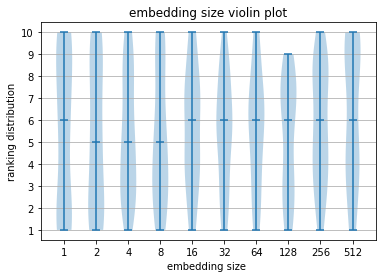

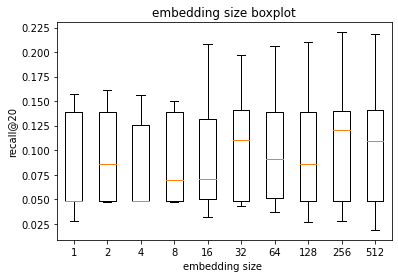

In [ ]:
# random model
import json 
from utils import violin_plot
embs_hp_list = ['1','2', '4','8','16','32','64', '128', '256', '512']
embgroups = np.array([[] for item in embs_hp_list],dtype='int32')
load_dict_list = []
embedding_dim_result_list_dict = {}

for embsize in embs_hp_list:
     embedding_dim_result_list_dict[embsize] = []

for num in [200,201,202,205,206,207,208]:
     with open("emb_random/embinfo" + str(num) + ".json",'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          # load_dict_list.append(load_dict_tmp)
          # embedding_dim_result_list_dict.append(load_dict_tmp)
          for embs in embs_hp_list:
               embedding_dim_result_list_dict[embs].extend(load_dict_tmp[embs])
          group_tmp = np.array(list(load_dict_tmp.values()))
          embgroups = np.concatenate((embgroups , group_tmp), axis=1)
          
# print("group len: {}, config num: {}".format(len(embgroups), embgroups[0].shape[0]))
embranks = get_rank_from_score(embgroups)
print("ranks.shape: {}".format(embranks.shape))
emb_srcc = get_srcc_from_rank(groups=embgroups, ranks=embranks, optslist=embs_hp_list)
print("embsrcc: {}".format(emb_srcc))
# print("group len: {}, shape: {}\ngroups: {}".format(len(groups), groups[0].shape, groups))
viofig = violin_plot(groups=embgroups, xlabel=embs_hp_list, figtitle='embedding size ')
viofig.savefig(os.path.join('box_violin_plot', os.path.join( 'embedding_size_violin_plot_' + curr_dataset)))
hpfig = hp_boxplot(groups=embgroups, xlabel=embs_hp_list, figtitle='embedding size ')
hpfig.savefig(os.path.join('box_violin_plot', os.path.join( 'embedding_size_boxplot_'+curr_dataset)))
# hpfig.close()

## weight decay

group len: 5, shape: (30,)
ranks.shape: (30, 5)
wd_srcc: 1.0


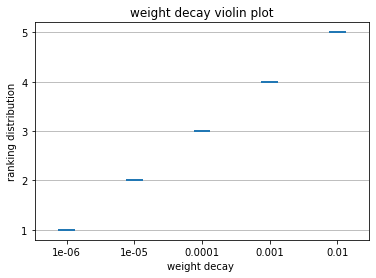

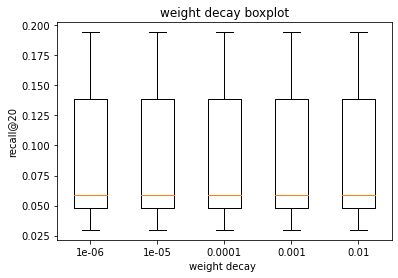

In [ ]:
import json 
import numpy as np
from utils import *

wd_hp_list = ['1e-06','1e-05', '0.0001','0.001','0.01']
wdgroups = np.array([[] for item in wd_hp_list],dtype='float')
load_dict_list = []
for num in [200,201,202,203,204,205,206]:
     with open("weight_random/wdinfo" + str(num) + ".json",'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          wdgroups = np.concatenate((wdgroups , group_tmp), axis=1)
# load_dict = load_dict1.copy()

print("group len: {}, shape: {}".format(len(wdgroups), wdgroups[0].shape))
wdranks = get_rank_from_score(wdgroups)
print("ranks.shape: {}".format(wdranks.shape))
wd_srcc = get_srcc_from_rank(groups=wdgroups, ranks=wdranks, optslist=wd_hp_list)
print("wd_srcc: {}".format(wd_srcc))
# print("group len: {}, shape: {}\ngroups: {}".format(len(groups), groups[0].shape, groups))
fig = violin_plot(groups=wdgroups, xlabel=wd_hp_list, figtitle='weight decay ')
fig.savefig(os.path.join('box_violin_plot', os.path.join( 'weight_decay_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=wdgroups, xlabel=wd_hp_list, figtitle='weight decay ')
fig.savefig(os.path.join('box_violin_plot', os.path.join('weight_decay_boxplot_'+curr_dataset)))

ranks.shape: (4, 6)
spsrcc: 1.0


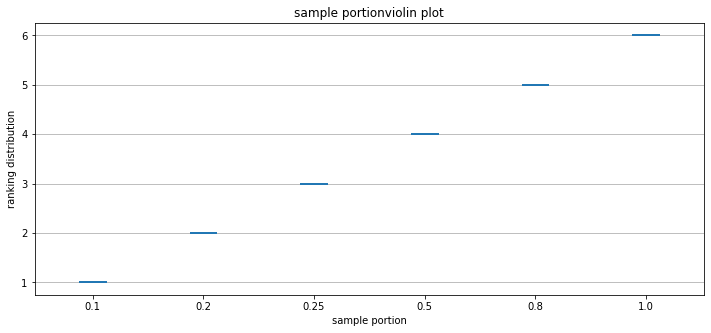

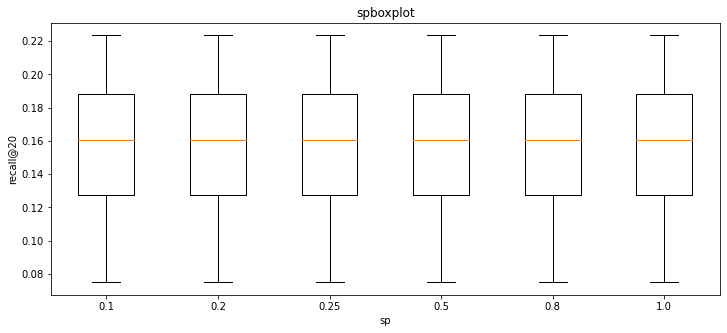

In [2]:
# using better models
import json 
import numpy as np
%reload_ext autoreload
%autoreload 2
from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
# lrgroups = np.array([[],[],[],[],[],[],[],[],[],[],[],[]],dtype='float')
sample_portion_hp_list0 = ['0.1','0.2', '0.25','0.5','0.8','1.0']
sp_hp_list = [str(float(sp)) for sp in sample_portion_hp_list0]
spgroups = np.array([[] for item in sp_hp_list],dtype='float')

# load_dict_list = []
files = []
# files += [os.path.join('_random', 'lr_random_nas_dicts_ml-100k_1.json')]
files += [os.path.join('sample_random', 'spinfo' + str(num) + '.json') for num in [1]]
for f1 in files:
     with open(f1,'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          # load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          spgroups = np.concatenate((spgroups , group_tmp), axis=1)
# load_dict = load_dict1.copy()
# print(lrgroups)
# print("group len: {}, shape: {}".format(len(lrgroups), lrgroups[0].shape[0]))
hp_num = 6
spgroups = spgroups[:hp_num,:]
spranks = get_rank_from_score(spgroups)
print("ranks.shape: {}".format(spranks.shape))
sp_srcc = get_srcc_from_rank(groups=spgroups, ranks=spranks, optslist=sp_hp_list[:hp_num])
print("spsrcc: {:.4}".format(sp_srcc))
fig = violin_plot(groups=spgroups, xlabel=sample_portion_hp_list0[:hp_num], figtitle='sample portion')
fig.savefig(os.path.join('box_violin_plot', os.path.join('sample_portion_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=spgroups, xlabel=sample_portion_hp_list0[:hp_num], figtitle='sp')
fig.savefig(os.path.join('box_violin_plot', os.path.join('sample_portion_boxplot_'+curr_dataset)))


## SRCC show bar plot

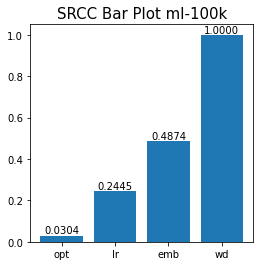

In [ ]:
# 虚拟数据
x = ["opt", "lr", "emb", "wd"]
y = [opt_srcc, lr_srcc, emb_srcc, wd_srcc]

# 方式2（推荐）
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(x=x, height=y)
ax.set_title("SRCC Bar Plot ml-100k", fontsize=15)
for a,b in zip(x, y):
    plt.text(a,b, '%.4f'%b, ha='center',  va='bottom', )
fig.savefig(os.path.join('box_violin_plot', os.path.join('srcc_ml-100k')))


## Others

In [ ]:
tmpfilename1='MLP_ml-100k_32_Adagrad0.001_explicit_1e-05_1_2022-02-21-11:56:50.txt'
fp_item_dict1 = get_item_from_filename(tmpfilename1)
print("fp_item_dict: {}".format(fp_item_dict1))
# epoch_list,bprloss_list,recall20_list = get_loss_recall(filename=tmpfilename)
# recall20_list
dateTime_1 = datetime.datetime.strptime(fp_item_dict1['time'],'%Y-%m-%d-%H:%M:%S')
print(dateTime_1) 

tmpfilename2='MLP_ml-100k_64_Adam1.5_implicit_1e-05_1_2022-02-01-18:13:35.txt'
fp_item_dict2 = get_item_from_filename(tmpfilename2)
print("fp_item_dict: {}".format(fp_item_dict2))
# epoch_list,bprloss_list,recall20_list = get_loss_recall(filename=tmpfilename)
# recall20_list
dateTime_2 = datetime.datetime.strptime(fp_item_dict2['time'],'%Y-%m-%d-%H:%M:%S')
print(dateTime_2) 

dateTime_1 < dateTime_2

fp_item_dict: {'mode': 'MLP', 'dataset': 'ml-100k', 'embedding_dim': 32, 'opt': 'Adagrad', 'lr': 0.001, 'data_type': 'explicit', 'weight_decay': 1e-05, 'seed': 1, 'time': '2022-02-21-11:56:50'}
2022-02-21 11:56:50
fp_item_dict: {'mode': 'MLP', 'dataset': 'ml-100k', 'embedding_dim': 64, 'opt': 'Adam', 'lr': 1.5, 'data_type': 'implicit', 'weight_decay': 1e-05, 'seed': 1, 'time': '2022-02-01-18:13:35'}
2022-02-01 18:13:35


False

(100, 100)
(100, 100)


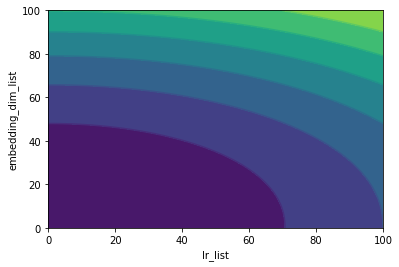

In [ ]:
# lr_list = np.logspace(0,10,100,base=10)
# embedding_dim_list = np.logspace(0,10,100,base=10)
lr_list = np.linspace(0,100,100)
embedding_dim_list = np.linspace(0,100,100)
xx,yy = np.meshgrid(lr_list, embedding_dim_list)
print(xx.shape)
loss_z = xx + yy
print(loss_z.shape)
cnt = 0
for i in range(len(lr_list)):
    for j in range(len(embedding_dim_list)):
        # print("i:{}, j:{}".format(i, j))
        # embedding_dim_result_list_dict[embsize].append(max_recall)
        # print("[Index: {}|{}], max_epoch: {},  max_recall: {}".format(i+1,anchor_config_num, max_epoch, max_recall))
        loss_z[j][i] = lr_list[i]**2 + embedding_dim_list[j]**2.2
        cnt += 1
plt.contourf(xx,yy,loss_z)
plt.contour(xx,yy,loss_z)#在z=3.5,4,4.4,5处绘制等高线，等高线位置必须递增排序
plt.xlabel('lr_list')
plt.ylabel('embedding_dim_list')
plt.show()
# print(z.min(),z.max())#得出z的最大最小值，即为等高线取值范围，等高线范围为（3,7）
  

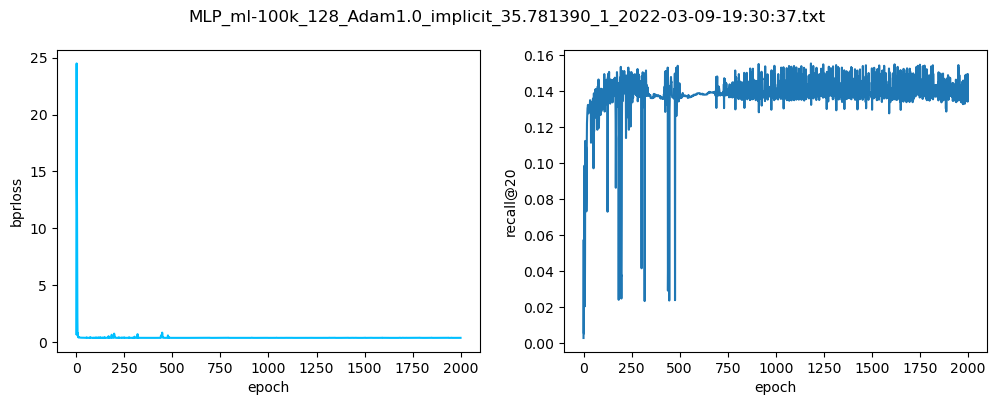

In [ ]:
# fp = 'GMF_ml-100k_4_Adagrad10.0_implicit_0.011011_1_2022-03-08-21:25:01.txt'
from utils import get_loss_recall, plot_loss_recall
# fp = 'MLP_ml-1m_2_Adagrad0.01_implicit_0.000010_1_2022-03-09-13:25:20.txt'
# fp = 'MLP_ml-100k_62_Adam1e-05_implicit_50.195729_1_2022-03-09-13:49:55.txt'
fp = 'MLP_ml-100k_128_Adam1.0_implicit_35.781390_1_2022-03-09-19:30:37.txt'
epoch_list,bprloss_list,recall20_list = get_loss_recall(filename=fp, train_epochs=2000, savedir='lr_random')
plot_loss_recall(epoch_list,bprloss_list,recall20_list,subtitle=fp)

In [ ]:
from time import localtime, sleep, strftime, time
# time()
current_time = strftime("%Y-%m-%d-%H:%M:%S", localtime())
current_time

'2022-03-14-09:24:31'

In [ ]:
a = [1,2,3,4,5]
a[-5:]

[1, 2, 3, 4, 5]